# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [17]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        
        # Set memory growth to avoid allocating all GPU memory at once
        tf.config.experimental.set_memory_growth(gpus[0], True)
        
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 228s 100ms/step - loss: 1.3460 - accuracy: 0.6041 - val_loss: 0.4755 - val_accuracy: 0.8473
Epoch 2/10
2197/2197 [==============================] - 203s 92ms/step - loss: 0.4326 - accuracy: 0.8630 - val_loss: 0.2879 - val_accuracy: 0.9098
Epoch 3/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.2619 - accuracy: 0.9153 - val_loss: 0.2917 - val_accuracy: 0.9055
Epoch 4/10
2197/2197 [==============================] - 212s 97ms/step - loss: 0.1775 - accuracy: 0.9424 - val_loss: 0.1775 - val_accuracy: 0.9418
Epoch 5/10
2197/2197 [==============================] - 215s 98ms/step - loss: 0.1300 - accuracy: 0.9566 - val_loss: 0.1435 - val_accuracy: 0.9566
Epoch 6/10
2197/2197 [==============================] - 217s 99ms/step - loss: 0.1037 - accuracy: 0.9654 - val_loss: 0.1627 - val_accuracy: 0.9495
Epoch 7/10
2197/2197 [==============================] - 216s 98ms/step - loss: 0.0825 - accuracy: 0.9735 - val_loss: 

## Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 68s 31ms/step - loss: 0.0304 - accuracy: 0.9899
Training accuracy: 0.9899139404296875


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 17s 30ms/step - loss: 0.1104 - accuracy: 0.9674
Validation accuracy: 0.9674482345581055


### Saving Model

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [1.3459868431091309,
  0.43263065814971924,
  0.26185861229896545,
  0.1774580478668213,
  0.1300199180841446,
  0.10370386391878128,
  0.08250154554843903,
  0.07469288259744644,
  0.06142507120966911,
  0.055735718458890915],
 'accuracy': [0.6040970087051392,
  0.8629631996154785,
  0.9153140187263489,
  0.9424283504486084,
  0.956568717956543,
  0.9654313921928406,
  0.9735400676727295,
  0.9756597280502319,
  0.9804537892341614,
  0.9821040034294128],
 'val_loss': [0.47554340958595276,
  0.2878854274749756,
  0.29172858595848083,
  0.17746786773204803,
  0.1435433030128479,
  0.162687286734581,
  0.14211922883987427,
  0.13549929857254028,
  0.09801429510116577,
  0.11044938117265701],
 'val_accuracy': [0.8473138809204102,
  0.9097996950149536,
  0.9054746031761169,
  0.9417823553085327,
  0.9566355347633362,
  0.9495219588279724,
  0.9552697539329529,
  0.9585135579109192,
  0.9700090885162354,
  0.9674482345581055]}

In [273]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [274]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

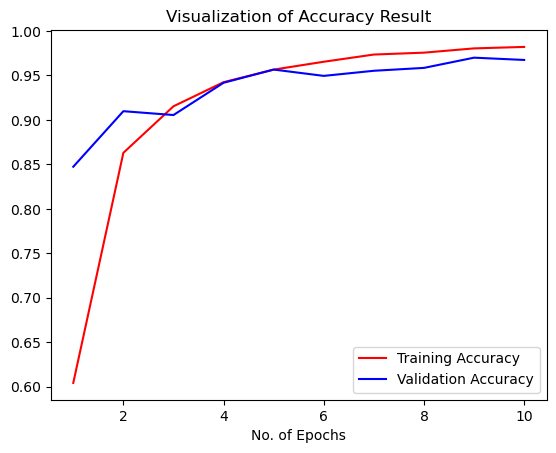

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [24]:
class_name = validation_set.class_names

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [26]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 82s 5ms/step


In [27]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [28]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [29]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [31]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.96      0.99      0.98       440
                                   Apple___healthy       0.98      0.93      0.96       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.82      0.87       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.85      0.99      0.

### Confusion Matrix Visualization

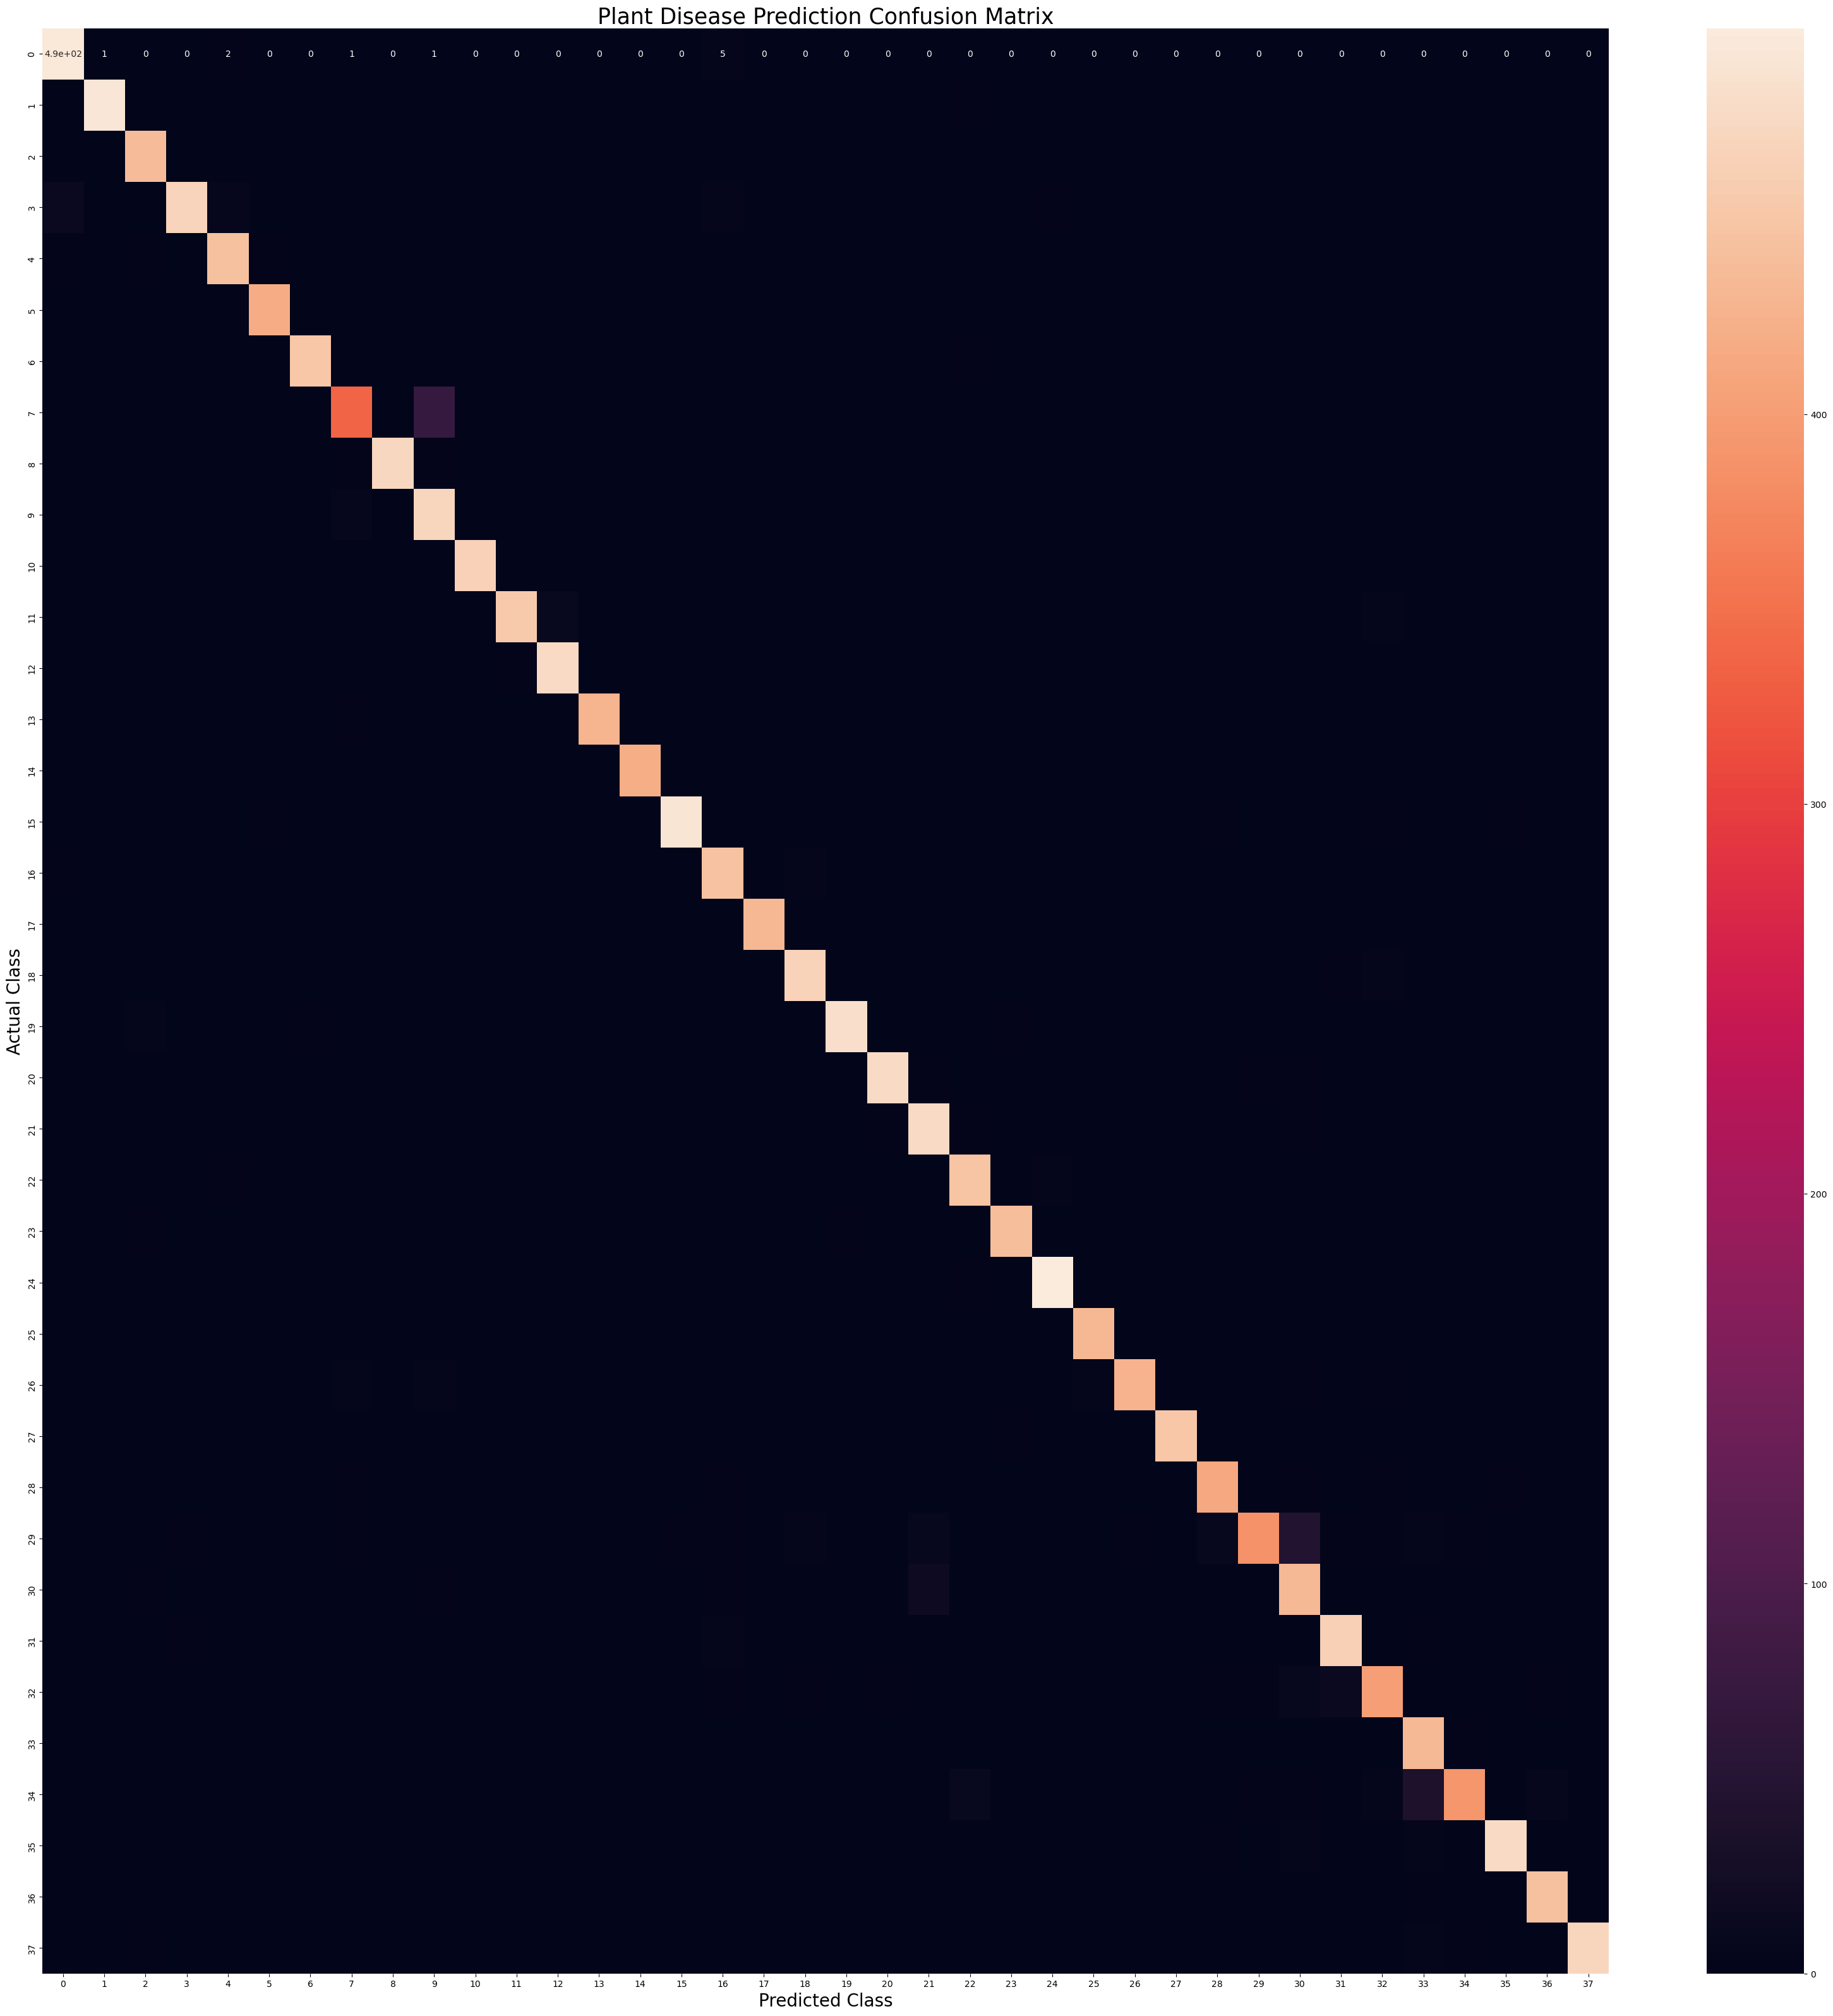

In [32]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()